***
***
***
<br><br><br><br><br>
<h1>Python for Business Analytics</h1>
<em>A Nontechnical Approach for Nontechnical People</em><br><br>
<em><strong>Custom Edition for Hult International Business School</strong></em><br>

Written by Konrad Ilczuk <br>
Hult International Business School <br>
***
***
***

# <u>Chapter X: Dictionaries </u>

We have previously covered sets and lists - two data structures in Python. This chapter will cover another one called the **dictionary**. The dictionary work as a <Key,Value> pair associated list. What this means is that differently from lists which elements can be accessed by an index, the dictionary is accessed by a **key**. 

Are dictionaries better than lists and sets? As with many things - it depends and less so on the intrinsics of each structure, but more on what you want to do and what structure will be better suited for your particular problem. This chapter aims at demonstrating the interesting characteristics of dictionaries in contrast to what we have learned previously.

### Declaring Dictionaries with Values

Recall that lists were declared with square brackets: []. Sets with curly brackets {}. Both lists and sets have their elements put inside their brackets separated by a comma.

Since dictionaries are an associative structure where a key is assigned to a specific value, this must naturally be reflected in the way we declare this property. For dictionaries we do {key:value}.

In [3]:
## Code XYZ ##

# Declaring a simple dictioniary
mydict = {'YearOfRelease':2020,'Planet':'Earth'}
print(mydict)

{'YearOfRelease': 2020, 'Planet': 'Earth'}


We have added two keys: 'YearOfRelease' and 'Planet' with their associated values: 2020 and 'Earth'. The former being an integer while the latter a string. Mixing types is perfectly fine also with dictionaries.

We can also insert a list as a value for a particular key:

In [5]:
## Code XYZ ##

# Declaring a dictioniary with another data structure as a value
mydict = {'YearOfRelease':2020,'Planet':'Earth','Authors':['Chase Kusterer','Konrad Ilczuk']}
print(mydict)

{'YearOfRelease': 2020, 'Planet': 'Earth', 'Authors': ['Chase Kusterer', 'Konrad Ilczuk']}


We can make our dictionary even more 'advanced' by inserting a dict withing a dict!

In [49]:
## Code XYZ ##

# Declaring a more complex dictioniary
book_and_authors_info = {
    'YearOfRelease':2020,
    'Planet':'Earth',
    'Authors':['Chase Kusterer','Konrad Ilczuk'],
    'Chase Kusterer':{
        'Friends':['James','Jane','Simon'],
        'Places':['Xangai','San Francisco'],
        'Projects':['Marketing Analytics','Titanic Survivors','Housing Prices Prediction']
    },
    'Konrad Ilczuk':{
        'Friends':['Andreia','Scott','George'],
        'Places':['Warsaw','Stockholm','Xangai','Sao Paulo'],
        'Projects':['Object Recognition on Satellite Images','Customer Purchase Propensit','Next-Best-Offer']
    }
}

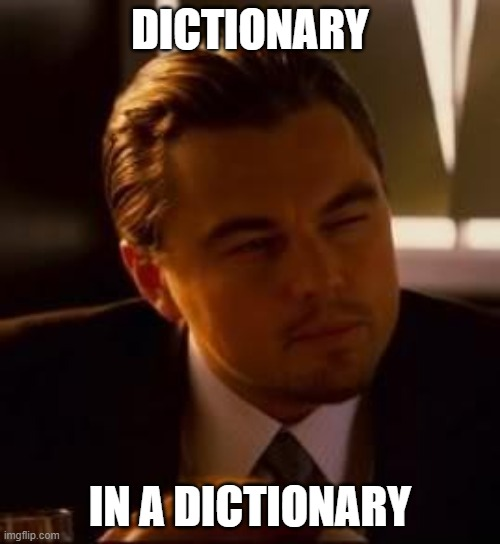

### Indexing - Retrieving Elements from a Dictionary

Now that we have a complex dictionary with some nested elements ready we can begin doing some interesting things with it. Let's first access an element from it. 

In [16]:
## Code XYZ ##

# Accessing an element from our dict
book_and_authors_info['Planet']

'Earth'

The same can be done with the list and dictionary nested:

In [17]:
book_and_authors_info['Authors']

['Chase Kusterer', 'Konrad Ilczuk']

In [18]:
book_and_authors_info['Chase Kusterer']

{'Friends': ['James', 'Jane', 'Simon'],
 'Places': ['Shanghai', 'San Francisco'],
 'Projects': ['Marketing Analytics',
  'Titanic Survivors',
  'Housing Prices Prediction']}

Accessing a specific element of the nested dictionary is not harder than:

In [14]:
mydict['Chase Kusterer']['Places']

['Shanghai', 'San Francisco']

## Adding, Modifying and Removing Elements in a Dictionary

### Adding

As we have seen in previous chapters - we can modify, add and remove elements from our data structures. Dictionaries are no different. Mistakes are made when inputing data, taking over a project from someone else and naturally we need to have adequate tools to handle that. 

An ISBN number is missing from our 'book_and_authors_info' as well as a title - naturally it falls on us to correct this.

In [20]:
## Code XYZ ##

# Adding elements to the dictionary
book_and_authors_info['ISBN'] = '978-7-16-148411-0'
book_and_authors_info['Title'] = 'Python for Business Analytics'

### Removing

Chase and Konrad really like their friends, but also realized that mentioning them around the topic of their book doesn't make much sense and have therefore decided to drop the lists of friends. We can use the pop() function for this, which retrieves the values we are about to delete before deleting them. This gives us visibility into what we are removing. An advantage of using pop() over another method that we will discuss below is that it won't complain (it will in fact do nothing) if they keys we want to remove are absent from the dictionary.

In [28]:
## Code XYZ ##

# Removing elements from the dictionary
book_and_authors_info['Chase Kusterer'].pop('Friends', None)
book_and_authors_info['Konrad Ilczuk'].pop('Friends', None)

['Andreia', 'Scott', 'George']

The other way of doing this is by using _del element_. This of course carries the risk of failing if the keys are absent. We have now removed the keys above, and if we try to repeat the same _pop()_ operation, everything will be fine. However not with _del_:

In [29]:
del book_and_authors_info['Konrad Ilczuk']['Friends']

KeyError: 'Friends'

To make this safe we would need to include a conditional statement to first check if the key exist and only if it does - remove it.

In [31]:
if 'Friends' in book_and_authors_info['Konrad Ilczuk']: 
    print("The key exists! Removing it right away!")
    del book_and_authors_info['Konrad Ilczuk']['Friends']
else:
    print("The key was never there or has already been removed")


The key was never there or has already been removed


Depending on the case, you might want to be aware of something missing, hence we presented two methods of removing elements.

### Modifying and Iterating Over a Dictionary

Chase and Konrad observed spelling mistakes. Not only did Konrad spell "Shanghai" as "Xangai"(portuguese spelling), but also the word "propensity" became "propensit". We cannot show our dictionary to the world in such shape.

In [35]:
## Code XYZ ##

# Modifying an element in the dictionary
book_and_authors_info['Konrad Ilczuk']['Projects'][1] = 'Customer Purchase Propensity'

Since "Xangai" has been consistently misspelled, instead of indexing every single element let's do this automatically by iterating over the 'Places" key and modifying those that are "Xangai".

To iterate over the entries of a dict we need to recognise that unlike lists where we could iterate in the following way:

In [39]:
for element in ['this','is','a','list']:
    print(element)

this
is
a
list


Dictionaries are organized with associations between Key and Value pairs and can therefore be looped as follows:

In [43]:
for key,value in book_and_authors_info.items():
    print(str(key) + ' : '+str(value))

YearOfRelease : 2020
Planet : Earth
Authors : ['Chase Kusterer', 'Konrad Ilczuk']
Chase Kusterer : {'Places': ['Xanghai', 'San Francisco'], 'Projects': ['Marketing Analytics', 'Titanic Survivors', 'Housing Prices Prediction']}
Konrad Ilczuk : {'Places': ['Warsaw', 'Stockholm', 'Xanghai', 'Sao Paulo'], 'Projects': ['Object Recognition on Satellite Images', 'Customer Purchase Propensity', 'Next-Best-Offer']}


With this in mind, we should now go through all **Authors** and their **Places** to correct this. This is a little bit of a more advanced topic, so don't be too scared when you see this nested loop - it serves more as a demonstration of what is possible to do.

In [54]:
#Enlist authors
for author in book_and_authors_info['Authors']:
    #For each authors places...
    for place in book_and_authors_info[author]['Places']:
        #If the place is "Xangai"
        if place == 'Xangai':
            #Find the index in the list where the mistake is 
            index = book_and_authors_info[author]['Places'].index('Xangai')
            #Correct the mistake
            book_and_authors_info[author]['Places'][index] = 'Shanghai'

In [55]:
book_and_authors_info

{'YearOfRelease': 2020,
 'Planet': 'Earth',
 'Authors': ['Chase Kusterer', 'Konrad Ilczuk'],
 'Chase Kusterer': {'Friends': ['James', 'Jane', 'Simon'],
  'Places': ['Shanghai', 'San Francisco'],
  'Projects': ['Marketing Analytics',
   'Titanic Survivors',
   'Housing Prices Prediction']},
 'Konrad Ilczuk': {'Friends': ['Andreia', 'Scott', 'George'],
  'Places': ['Warsaw', 'Stockholm', 'Shanghai', 'Sao Paulo'],
  'Projects': ['Object Recognition on Satellite Images',
   'Customer Purchase Propensit',
   'Next-Best-Offer']}}

# External Reading

- https://python-reference.readthedocs.io/en/latest/docs/dict/
- https://www.w3schools.com/python/python_dictionaries.asp

In [ ]:
student1.union(student2).union(student3).difference(student1.intersection(student2).intersection(student3))